In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
one_race_cols = {"Driver": "Driver", "WINS": "Win", "AS": "Start", "AMR": "Mid Race", "AF": "Finish",
                 "AP": "Average Position", "PD": "Pass Differential", "GP": "Green Passes", "GPD": "Green Passed",
                 "QP": "Quality Passes", "%QP": "% Quality Passes", "#FL": "Fastest Laps", "LTOP15": "Laps in Top 15",
                 "%LTOP15": "% Laps in Top 15", "LL": "Laps Led", "%LL": "% Laps Led", "TL": "Total Laps",
                 "DR": "Driver Rating", "PTS": "Points", "RACES": "Races"}

multi_race_cols = {"Driver": "Driver", "WINS": "Wins", "AS": "Average Start", "AMR": "Average Mid Race",
                   "AF": "Average Finish", "AP": "Average Position", "PD": "Pass Differential", "GP": "Green Passes",
                   "GPD": "Green Passed", "QP": "Quality Passes", "%QP": "% Quality Passes", "#FL": "Fastest Laps",
                   "LTOP15": "Laps in Top 15", "%LTOP15": "% Laps in Top 15", "LL": "Laps Led", "%LL": "% Laps Led",
                   "TL": "Total Laps", "DR": "Driver Rating", "PTS": "Points", "RACES": "Races"}

car_nums = {"AJ Allmendinger": 16, "Aric Almirola": 10, "Christopher Bell": 20, "Greg Biffle": 44,
             "Josh Bilicki": 77, "Ryan Blaney": 12, "Alex Bowman": 48, "Chase Briscoe": 14,
             "Chris Buescher": 17, "Harrison Burton": 21, "Kurt Busch": 45, "Kyle Busch": 18,
             "William Byron": 24, "Landon Cassill": 77, "Ross Chastain": 1,
             "Austin Cindric": 2, "Cole Custer": 41, "Austin Dillon": 3, "Ty Dillon": 42,
             "Chase Elliott": 9, "Todd Gilliland": 38, "Noah Gragson": 16, "Kaz Grala": 50,
             "Denny Hamlin": 11, "Joey Hand": 15, "Kevin Harvick": 4, "Justin Haley": 31,
             "Daniel Hemric": 16, "Loris Hezemans": 27, "Erik Jones": 20, "Brad Keselowski": 6,
             "Corey LaJoie": 7, "Kyle Larson": 5, "Joey Logano": 22, "BJ McLeod": 78,
             "Michael McDowell": 34, "Ryan Preece": 15, "David Ragan": 15, "Tyler Reddick": 8,
             "Boris Said": 66, "Garrett Smithley": 15, "Ricky Stenhouse Jr.": 47, "Daniel Suárez": 99,
             "Martin Truex Jr.": 19, "Jacques Villeneuve": 27, "Bubba Wallace": 23, "Cody Ware": 51}

teams = {"AJ Allmendinger": "Kaulig", "Aric Almirola": "SHR", "Christopher Bell": "JGR", "Greg Biffle": "NYR",
        "Josh Bilicki": "Spire", "Ryan Blaney": "Penske", "Alex Bowman": "Hendrick", "Chase Briscoe": "SHR",
        "Chris Buescher": "RFK", "Harrison Burton": "WBR", "Kurt Busch": "23X1", "Kyle Busch": "JGR",
        "William Byron": "Hendrick", "Landon Cassill": "Spire", "Ross Chastain": "Trackhouse", "Austin Cindric": "Penske",
        "Cole Custer": "SHR", "Austin Dillon": "RCR", "Ty Dillon": "PGMS", "Chase Elliott": "Hendrick",
        "Todd Gilliland": "FRM", "Noah Gragson": "Kaulig", "Kaz Grala": "TMT", "Denny Hamlin": "JGR",
        "Joey Hand": "RWR", "Kevin Harvick": "SHR", "Justin Haley": "Kaulig", "Daniel Hemric": "Kaulig",
        "Loris Hezemans": "Hezeberg", "Erik Jones": "PGMS", "Brad Keselowski": "RFK", "Corey LaJoie": "Spire",
        "Kyle Larson": "Hendrick", "Joey Logano": "Penske", "BJ McLeod": "LFM", "Michael McDowell": "FRM",
        "Ryan Preece": "RWR", "David Ragan": "RWR", "Tyler Reddick": "RCR", "Boris Said": "MBM",
        "Garrett Smithley": "RWR", "Ricky Stenhouse Jr.": "JTGD", "Daniel Suárez": "Trackhouse", "Martin Truex Jr.": "JGR",
        "Jacques Villeneuve": "Hezeberg", "Bubba Wallace": "23X1", "Cody Ware": "RWR"}

makes = {"23X1": "Toyota", "Beard": "Chevy", "FRM": "Ford", "Hendrick": "Chevy",
        "Hezeberg": "Ford", "JGR": "Toyota", "JTGD": "Chevy", "Kaulig": "Chevy",
        "LFM": "Ford", "MBM": "Ford", "NYR": "Chevy", "Penske": "Ford",
        "PGMS": "Chevy", "RCR": "Chevy", "RFK": "Ford", "RWR": "Ford",
        "SHR": "Ford", "Spire": "Chevy", "TMT": "Chevy", "Trackhouse": "Chevy",
        "WBR": "Ford"}

track_types = {"Auto Club": "Speedway", "Atlanta": "Superpeedway", "Bristol": "Short Track", "COTA": "Road Course",
               "Daytona": "Superspeedway", "Las Vegas": "Speedway", "Martinsville": "Short Track", "Phoenix": "Speedway",
               "Richmond": "Short Track", "Talladega": "Superspeedway"}

cup_laps = {1: 201}

In [3]:
daytona1 = pd.read_excel('NASCARStatsHub.xlsx', sheet_name = 0)
print(daytona1.columns)
daytona1.head()

Index(['Driver', 'WINS', 'AS', 'AMR', 'AF', 'AP', 'PD', 'GP', 'GPD', 'QP',
       '%QP', '#FL', 'LTOP15', '%LTOP15', 'LL', '%LL', 'TL', 'DR', 'PTS'],
      dtype='object')


,Driver,WINS,AS,AMR,AF,AP,PD,GP,GPD,QP,%QP,#FL,LTOP15,%LTOP15,LL,%LL,TL,DR,PTS
0,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54
1,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54
2,Martin Truex Jr.,0,14,18,13,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49
3,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47
4,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41


In [4]:
cup_1race = pd.read_excel('NASCARStatsHub.xlsx', sheet_name = 0)
cup_1race["RACES"] = 1
cup_2races = pd.read_excel('NASCARStatsHub.xlsx', sheet_name = 1)

In [5]:
def add_RACES(prev_df, curr_df):
    prev_df = prev_df.set_index('Driver')
    curr_df = curr_df.set_index('Driver')
    df = curr_df.copy()
    df["RACES"] = 1
    for driver in df.index:
        if driver in prev_df.index:
            if curr_df.loc[driver, "TL"] != prev_df.loc[driver, "TL"]:
                df.loc[driver, "RACES"] = prev_df.loc[driver, "TL"]  + 1   
            
    df = df.reset_index(drop = False)
    return df

cup_2races = add_RACES(cup_1race, cup_2races)
cup_2races

,Driver,WINS,AS,AMR,AF,AP,PD,GP,GPD,QP,%QP,#FL,LTOP15,%LTOP15,LL,%LL,TL,DR,PTS,RACES
0,Austin Cindric,1,3.0,5.0,6.5,8.0,-27,254,281,186,73.2,1,355,88.5,21,5.2,401,108.3,85,2
1,Joey Logano,0,13.5,8.0,13.0,11.5,82,331,249,145,43.8,13,278,69.8,15,3.8,398,96.9,77,2
2,Martin Truex Jr.,0,13.0,23.0,13.0,13.5,18,349,331,226,64.8,5,241,60.1,11,2.7,401,85.7,73,2
3,Ryan Blaney,0,6.5,3.5,11.0,7.6,42,282,240,236,83.7,11,364,90.8,37,9.2,401,102.6,70,2
4,Chase Briscoe,0,16.5,7.5,9.5,16.3,14,318,304,113,35.5,15,179,44.6,20,5.0,401,78.5,69,2
5,Erik Jones,0,7.5,12.0,16.0,8.2,-8,288,296,202,70.1,29,325,83.1,21,5.4,391,101.9,68,2
6,Aric Almirola,0,34.5,12.0,5.5,16.3,-16,338,354,145,42.9,5,214,53.4,0,0.0,401,78.6,66,2
7,Bubba Wallace,0,25.0,22.0,10.5,17.7,19,325,306,196,60.3,7,147,36.7,12,3.0,401,73.8,65,2
8,Kyle Larson,1,7.0,8.0,16.5,10.0,11,344,333,247,71.8,23,332,85.1,29,7.4,390,98.8,65,2
9,Brad Keselowski,0,6.0,8.0,18.0,12.0,14,249,235,180,72.3,4,266,66.7,67,16.8,399,91.1,64,2


In [6]:
def multi_race_to_one(prev_df, curr_df):
    prev_df = prev_df.set_index('Driver')
    curr_df = curr_df.set_index('Driver')
    df = curr_df.copy()
    for col in df.columns:
        df[col].values[:] = 0
    for driver in df.index:
        if driver in prev_df.index:
            df.loc[driver, "RACES"] = curr_df.loc[driver, "RACES"]
            
            df.loc[driver, "WINS"] = curr_df.loc[driver, "WINS"] - prev_df.loc[driver, "WINS"]
            df.loc[driver, "PD"] = curr_df.loc[driver, "PD"] - prev_df.loc[driver, "PD"]
            df.loc[driver, "GP"] = curr_df.loc[driver, "GP"] - prev_df.loc[driver, "GP"]
            df.loc[driver, "GPD"] = curr_df.loc[driver, "GPD"] - prev_df.loc[driver, "GPD"]
            df.loc[driver, "QP"] = curr_df.loc[driver, "QP"] - prev_df.loc[driver, "QP"]
            df.loc[driver, "#FL"] = curr_df.loc[driver, "#FL"] - prev_df.loc[driver, "#FL"]
            df.loc[driver, "LTOP15"] = curr_df.loc[driver, "LTOP15"] - prev_df.loc[driver, "LTOP15"]
            df.loc[driver, "LL"] = curr_df.loc[driver, "LL"] - prev_df.loc[driver, "LL"]
            df.loc[driver, "TL"] = curr_df.loc[driver, "TL"] - prev_df.loc[driver, "TL"]
            df.loc[driver, "PTS"] = curr_df.loc[driver, "PTS"] - prev_df.loc[driver, "PTS"]
            
            df.loc[driver, "AS"] = ((curr_df.loc[driver, "AS"] * curr_df.loc[driver, "RACES"]) 
                                    - (prev_df.loc[driver, "AS"] * prev_df.loc[driver, "RACES"]))
            df.loc[driver, "AMR"] = ((curr_df.loc[driver, "AMR"] * curr_df.loc[driver, "RACES"]) 
                                    - (prev_df.loc[driver, "AMR"] * prev_df.loc[driver, "RACES"]))
            df.loc[driver, "AF"] = ((curr_df.loc[driver, "AF"] * curr_df.loc[driver, "RACES"]) 
                                    - (prev_df.loc[driver, "AF"] * prev_df.loc[driver, "RACES"]))
            df.loc[driver, "DR"] = ((curr_df.loc[driver, "DR"] * curr_df.loc[driver, "RACES"]) 
                                    - (prev_df.loc[driver, "DR"] * prev_df.loc[driver, "RACES"]))
            
            if df.loc[driver, "LTOP15"] > 0:
                df.loc[driver, "%LTOP15"] = round((df.loc[driver, "LTOP15"] / df.loc[driver, "TL"]) * 100,1)
                
            if df.loc[driver, "LL"] > 0:
                df.loc[driver, "%LL"] = round((df.loc[driver, "LL"] / df.loc[driver, "TL"]) * 100,1)
            
            if df.loc[driver, "QP"] > 0:
                df.loc[driver, "%QP"] = round((df.loc[driver, "QP"] / df.loc[driver, "GP"]) * 100,1)
            
            if df.loc[driver, "TL"] > 0:
                df.loc[driver, "AP"] = round(((curr_df.loc[driver, "AP"]*curr_df.loc[driver, "TL"]
                                        - prev_df.loc[driver, "AP"]*prev_df.loc[driver, "TL"]) / df.loc[driver, "TL"]),1)
            else:
                df.drop(driver, inplace = True)
                
        else:
            df.loc[driver] = curr_df.loc[driver]
            
    df = df.reset_index(drop = False)
    df = df.rename(columns = one_race_cols, errors = "raise")
    return df

In [7]:
autoclub = multi_race_to_one(cup_1race, cup_2races)
autoclub

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races
0,Austin Cindric,0.0,1.0,8.0,12.0,9.8,-14.0,86.0,100.0,61.0,70.9,1.0,179.0,89.5,0.0,0.0,200.0,94.2,31.0,2.0
1,Joey Logano,0.0,7.0,4.0,5.0,5.4,32.0,87.0,55.0,66.0,75.9,5.0,198.0,99.0,14.0,7.0,200.0,110.2,44.0,2.0
2,Martin Truex Jr.,0.0,12.0,28.0,13.0,15.1,-7.0,91.0,98.0,34.0,37.4,1.0,98.0,49.0,0.0,0.0,200.0,77.4,24.0,2.0
3,Ryan Blaney,0.0,6.0,6.0,18.0,6.9,60.0,119.0,59.0,102.0,85.7,8.0,189.0,94.5,1.0,0.5,200.0,97.7,29.0,2.0
4,Chase Briscoe,0.0,24.0,5.0,16.0,14.3,-3.0,109.0,112.0,43.0,39.4,9.0,91.0,45.5,20.0,10.0,200.0,82.0,28.0,2.0
5,Erik Jones,0.0,2.0,7.0,3.0,4.5,13.0,72.0,59.0,64.0,88.9,23.0,200.0,100.0,18.0,9.0,200.0,122.8,52.0,2.0
6,Aric Almirola,0.0,31.0,13.0,6.0,16.7,-24.0,94.0,118.0,48.0,51.1,1.0,110.0,55.0,0.0,0.0,200.0,76.9,34.0,2.0
7,Bubba Wallace,0.0,34.0,25.0,19.0,25.2,3.0,72.0,69.0,5.0,6.9,0.0,2.0,1.0,0.0,0.0,200.0,42.9,18.0,2.0
8,Kyle Larson,1.0,13.0,3.0,1.0,7.2,24.0,83.0,59.0,63.0,75.9,16.0,183.0,91.5,28.0,14.0,200.0,116.4,52.0,2.0
9,Brad Keselowski,0.0,9.0,11.0,27.0,19.3,13.0,78.0,65.0,32.0,41.0,0.0,68.0,34.3,0.0,0.0,198.0,60.9,10.0,2.0


In [8]:
daytona1 = cup_1race.rename(columns = one_race_cols, errors = "raise")
daytona1.head()

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races
0,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1
1,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1
2,Martin Truex Jr.,0,14,18,13,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49,1
3,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1
4,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1


In [9]:
def add_cols(df, track = "", racenum = 0):
    df["Points Eligible"] = [1 if row > 0 else 0 for row in df["Points"]]
    df["Car #"] = df["Driver"].map(car_nums)
    df["Team"] = df["Driver"].map(teams)
    df["Make"] = df["Team"].map(makes)
    df["Race #"] = racenum
    df["Track"] = track
    df["Track Type"] = df["Track"].map(track_types)
    df["Quality Passes Per Lap"] = round(df["Quality Passes"] / df["Total Laps"], 3)

In [10]:
add_cols(daytona1, "Daytona", 1)
daytona1

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap
0,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622
1,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736
2,Martin Truex Jr.,0,14,18,13,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49,1,1,19,JGR,Toyota,1,Daytona,Superspeedway,0.955
3,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950
4,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348
5,Ryan Blaney,0,7,1,4,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,12,Penske,Ford,1,Daytona,Superspeedway,0.667
6,Michael McDowell,0,6,8,7,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,34,FRM,Ford,1,Daytona,Superspeedway,0.796
7,Kyle Busch,0,10,20,6,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,18,JGR,Toyota,1,Daytona,Superspeedway,0.905
8,Chris Buescher,0,4,3,16,7.9,-13,161,174,136,84.5,1,173,86.5,0,0.0,200,97.4,35,1,1,17,RFK,Ford,1,Daytona,Superspeedway,0.680
9,Chase Elliott,0,11,23,10,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,9,Hendrick,Chevy,1,Daytona,Superspeedway,0.652


In [11]:
def gragson_at_beard(df): # Fix for superspeedways; otherwise, it's assumed Gragson races for Kaulig in the 16
    for index, row in df.iterrows():
        if row["Driver"] == "Noah Gragson":
            if row["Track Type"] == "Superspeedway":
                df.loc[index, "Team"] = "Beard"
                df.loc[index, "Car #"] = 62
            print("{} raced for {} in the #{} car at {}.".format(df.loc[index, "Driver"], 
                                                 df.loc[index, "Team"],
                                                 df.loc[index, "Car #"],
                                                 df.loc[index, "Track"]))

In [12]:
gragson_at_beard(daytona1)
daytona1

Noah Gragson raced for Beard in the #62 car at Daytona.


,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap
0,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622
1,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736
2,Martin Truex Jr.,0,14,18,13,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49,1,1,19,JGR,Toyota,1,Daytona,Superspeedway,0.955
3,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950
4,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348
5,Ryan Blaney,0,7,1,4,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,12,Penske,Ford,1,Daytona,Superspeedway,0.667
6,Michael McDowell,0,6,8,7,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,34,FRM,Ford,1,Daytona,Superspeedway,0.796
7,Kyle Busch,0,10,20,6,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,18,JGR,Toyota,1,Daytona,Superspeedway,0.905
8,Chris Buescher,0,4,3,16,7.9,-13,161,174,136,84.5,1,173,86.5,0,0.0,200,97.4,35,1,1,17,RFK,Ford,1,Daytona,Superspeedway,0.680
9,Chase Elliott,0,11,23,10,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,9,Hendrick,Chevy,1,Daytona,Superspeedway,0.652


In [13]:
def raw_laps_to_stats(json_file): # Takes lap-times.json file from Race Center, mapping lap stats to drivers
    
    f = open(json_file)
    data = json.load(f)
    
    driver_stats = {}
    
    for i in data["laps"]:
        driver = i["FullName"]
        if driver.startswith("*") == True:
            driver = driver[2:]
        if driver.endswith("#") == True:
            driver = driver[:-2]
        elif driver.endswith(")") == True:
            driver = driver[:-3]
        if driver == "William Byron Jr.":
            driver = "William Byron"
        if driver == "Daniel Suarez":
            driver = "Daniel Suárez"
    
        lap_list = []
        #for j in i["Laps"]:
        #    lap_list.append(j["LapTime"])
        lap_list = [j["LapTime"] for j in i["Laps"]]
        lap_list = [i for i in lap_list if i] # This removes the "none" values
    
        fast_lap = np.min(lap_list)
        median_lap = round(np.median(lap_list),3)
    
        full_speed_laps = []
        for lap in lap_list:
            if lap < fast_lap*1.1:
                full_speed_laps.append(lap)
        average_full_speed_lap = round(np.mean(full_speed_laps),3)
    
        lap_dict = {"Fastest Lap": fast_lap, "Median Lap": median_lap, "Average Full Speed Lap": average_full_speed_lap}
        driver_stats[driver] = lap_dict
    
    return driver_stats

In [14]:
laps_daytona1_dict = raw_laps_to_stats("lap-times-daytona1.json")
laps_daytona1_dict

{'Austin Cindric': {'Fastest Lap': 46.102,
  'Median Lap': 47.081,
  'Average Full Speed Lap': 46.992},
 'Bubba Wallace': {'Fastest Lap': 46.114,
  'Median Lap': 47.094,
  'Average Full Speed Lap': 46.973},
 'Chase Briscoe': {'Fastest Lap': 46.046,
  'Median Lap': 47.238,
  'Average Full Speed Lap': 47.263},
 'Ryan Blaney': {'Fastest Lap': 46.141,
  'Median Lap': 47.081,
  'Average Full Speed Lap': 47.014},
 'Aric Almirola': {'Fastest Lap': 46.196,
  'Median Lap': 47.131,
  'Average Full Speed Lap': 47.068},
 'Kyle Busch': {'Fastest Lap': 46.152,
  'Median Lap': 47.098,
  'Average Full Speed Lap': 47.0},
 'Michael McDowell': {'Fastest Lap': 46.03,
  'Median Lap': 47.162,
  'Average Full Speed Lap': 47.044},
 'David Ragan': {'Fastest Lap': 45.867,
  'Median Lap': 47.424,
  'Average Full Speed Lap': 47.282},
 'Brad Keselowski': {'Fastest Lap': 46.07,
  'Median Lap': 47.084,
  'Average Full Speed Lap': 46.987},
 'Chase Elliott': {'Fastest Lap': 46.247,
  'Median Lap': 47.242,
  'Average F

In [15]:
def add_lap_dict_to_df(lap_dict, main_df): # Adds the driver-mapped lap stats to our main dataframe
    
    rows = []
  
    for key, value in lap_dict.items():
        driver = key
        stats = value
        stats["Driver"] = driver
        rows.append(stats)
  
    lap_df = pd.DataFrame(rows)
    df = pd.merge(main_df, lap_df, on="Driver")
    return df

In [16]:
daytona1 = add_lap_dict_to_df(laps_daytona1_dict, daytona1)
daytona1.head()

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap
0,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992
1,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987
2,Martin Truex Jr.,0,14,18,13,11.9,25,258,233,192,74.4,4,143,71.1,11,5.5,201,94.0,49,1,1,19,JGR,Toyota,1,Daytona,Superspeedway,0.955,46.059,47.126,47.018
3,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973
4,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263


In [17]:
daytona1 = daytona1.sort_values(by=["Finish"]).reset_index(drop = True)
daytona1.index = np.arange(1, len(daytona1) + 1) # Makes index value equal to finish position
daytona1

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap
1,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992
2,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973
3,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263
4,Ryan Blaney,0,7,1,4,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,12,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014
5,Aric Almirola,0,38,11,5,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,10,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068
6,Kyle Busch,0,10,20,6,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,18,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000
7,Michael McDowell,0,6,8,7,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,34,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044
8,David Ragan,0,34,29,8,25.2,-9,110,119,8,7.3,6,18,9.0,0,0.0,201,63.7,29,1,1,15,RWR,Ford,1,Daytona,Superspeedway,0.040,45.867,47.424,47.282
9,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987
10,Chase Elliott,0,11,23,10,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,9,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195


In [18]:
def add_lap_ranks(df):
    df["Fastest Lap Rank"] = df["Fastest Lap"].rank(method="min")
    df["Median Lap Rank"] = df["Median Lap"].rank(method="min")
    df["Average Full Speed Lap Rank"] = df["Average Full Speed Lap"].rank(method="min")
    return df

In [19]:
daytona1 = add_lap_ranks(daytona1)
daytona1

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap,Fastest Lap Rank,Median Lap Rank,Average Full Speed Lap Rank
1,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992,13.0,4.0,6.0
2,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973,15.0,9.0,3.0
3,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263,7.0,22.0,25.0
4,Ryan Blaney,0,7,1,4,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,12,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014,18.0,4.0,10.0
5,Aric Almirola,0,38,11,5,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,10,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068,25.0,15.0,17.0
6,Kyle Busch,0,10,20,6,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,18,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000,20.0,11.0,8.0
7,Michael McDowell,0,6,8,7,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,34,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044,6.0,17.0,14.0
8,David Ragan,0,34,29,8,25.2,-9,110,119,8,7.3,6,18,9.0,0,0.0,201,63.7,29,1,1,15,RWR,Ford,1,Daytona,Superspeedway,0.040,45.867,47.424,47.282,1.0,29.0,26.0
9,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987,10.0,7.0,5.0
10,Chase Elliott,0,11,23,10,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,9,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195,27.0,23.0,22.0


In [20]:
daytona1_contenders = daytona1[daytona1["Quality Passes"] >= 10] # Gets rid of cars not part of draft for most of race
daytona1_contenders

,Driver,Win,Start,Mid Race,Finish,Average Position,Pass Differential,Green Passes,Green Passed,Quality Passes,% Quality Passes,Fastest Laps,Laps in Top 15,% Laps in Top 15,Laps Led,% Laps Led,Total Laps,Driver Rating,Points,Races,Points Eligible,Car #,Team,Make,Race #,Track,Track Type,Quality Passes Per Lap,Fastest Lap,Median Lap,Average Full Speed Lap,Fastest Lap Rank,Median Lap Rank,Average Full Speed Lap Rank
1,Austin Cindric,1,5,2,1,6.2,-13,168,181,125,74.4,0,176,87.6,21,10.4,201,122.4,54,1,1,2,Penske,Ford,1,Daytona,Superspeedway,0.622,46.102,47.081,46.992,13.0,4.0,6.0
2,Bubba Wallace,0,16,19,2,10.2,16,253,237,191,75.5,7,145,72.1,12,6.0,201,104.7,47,1,1,23,23X1,Toyota,1,Daytona,Superspeedway,0.950,46.114,47.094,46.973,15.0,9.0,3.0
3,Chase Briscoe,0,9,10,3,18.3,17,209,192,70,33.5,6,88,43.8,0,0.0,201,75.0,41,1,1,14,SHR,Ford,1,Daytona,Superspeedway,0.348,46.046,47.238,47.263,7.0,22.0,25.0
4,Ryan Blaney,0,7,1,4,8.3,-18,163,181,134,82.2,3,175,87.1,36,17.9,201,107.5,41,1,1,12,Penske,Ford,1,Daytona,Superspeedway,0.667,46.141,47.081,47.014,18.0,4.0,10.0
5,Aric Almirola,0,38,11,5,15.9,8,244,236,97,39.8,4,104,51.7,0,0.0,201,80.3,32,1,1,10,SHR,Ford,1,Daytona,Superspeedway,0.483,46.196,47.131,47.068,25.0,15.0,17.0
6,Kyle Busch,0,10,20,6,11.4,9,255,246,182,71.4,5,125,62.2,28,13.9,201,101.4,38,1,1,18,JGR,Toyota,1,Daytona,Superspeedway,0.905,46.152,47.098,47.000,20.0,11.0,8.0
7,Michael McDowell,0,6,8,7,11.9,-19,222,241,160,72.1,2,144,71.6,0,0.0,201,93.6,39,1,1,34,FRM,Ford,1,Daytona,Superspeedway,0.796,46.030,47.162,47.044,6.0,17.0,14.0
9,Brad Keselowski,0,3,5,9,4.8,1,171,170,148,86.5,4,198,98.5,67,33.3,201,121.3,54,1,1,6,RFK,Ford,1,Daytona,Superspeedway,0.736,46.070,47.084,46.987,10.0,7.0,5.0
10,Chase Elliott,0,11,23,10,16.1,-2,249,251,131,52.6,6,93,46.3,0,0.0,201,72.5,34,1,1,9,Hendrick,Chevy,1,Daytona,Superspeedway,0.652,46.247,47.242,47.195,27.0,23.0,22.0
11,Ty Dillon,0,26,9,11,16.3,-20,210,230,62,29.5,3,102,50.7,0,0.0,201,77.7,26,1,1,42,PGMS,Chevy,1,Daytona,Superspeedway,0.308,46.273,47.117,47.038,28.0,13.0,13.0


In [21]:
daytona1_varsofinterest = daytona1[["Finish", "Average Position", "Pass Differential", "Quality Passes", "% Quality Passes",
                                   "Quality Passes Per Lap", "Fastest Lap", "Median Lap", "Average Full Speed Lap"]]
daytona1_corr = daytona1_varsofinterest.corr()

In [22]:
daytona1_contenders_varsofinterest = daytona1_contenders[["Finish", "Average Position", "Pass Differential", "Quality Passes",
                                   "% Quality Passes", "Quality Passes Per Lap", "Fastest Lap", "Median Lap", "Average Full Speed Lap"]]
daytona1_contenders_corr = daytona1_contenders_varsofinterest.corr()

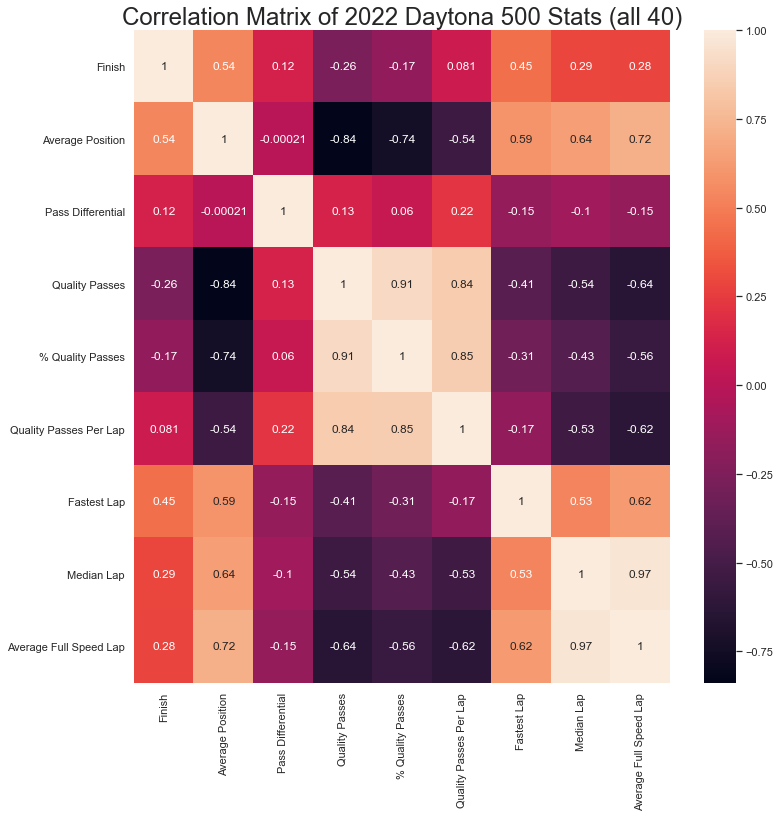

In [23]:
sns.set_theme(rc = {'figure.figsize':(12,12)})
heatmap_daytona1 = sns.heatmap(daytona1_corr, annot=True)
heatmap_daytona1.set_title("Correlation Matrix of 2022 Daytona 500 Stats (all 40)", fontsize=24)
plt.show()

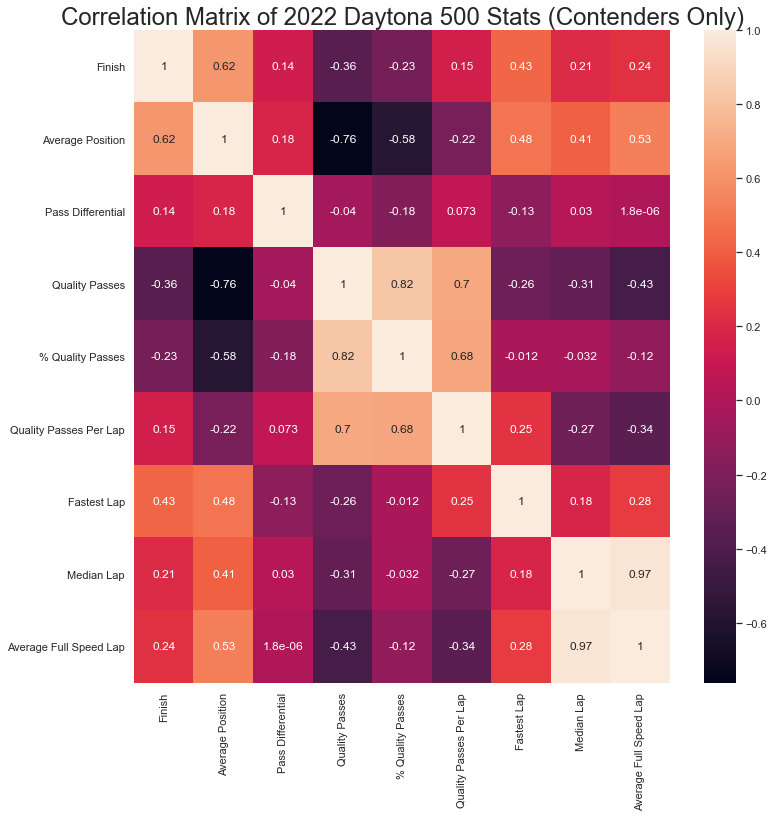

In [24]:
sns.set_theme(rc = {'figure.figsize':(12,12)})
heatmap_daytona1 = sns.heatmap(daytona1_contenders_corr, annot=True)
heatmap_daytona1.set_title("Correlation Matrix of 2022 Daytona 500 Stats (Contenders Only)", fontsize=24)
plt.show()